In [1]:
%%capture
! pip install transformers datasets evaluate
! pip install accelerate
! pip install --upgrade accelerate
! pip install huggingface_hub

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
from datasets import load_dataset
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import Dataset
from tqdm.auto import tqdm
from transformers import pipeline
import matplotlib.pyplot as plt


########################################################################################################################
# This script needs GPU acceleration e.g. via Google Colab
########################################################################################################################


# Define dataset structure
class NewsDataset(Dataset):
    def __init__(self, original_list):
        self.original_list = original_list

    def __len__(self):
        return len(self.original_list)

    def __getitem__(self, i):
        return self.original_list[i]


# Load dataset
d = load_dataset("csv", data_files="/content/drive/MyDrive/masterProject/av_test.csv")
d = d["train"]

# Instantiate dataset
dataset = NewsDataset(d["summary"])

# Create a pipeline using the desired model and tokenizer using a GPU
pipe = pipeline("text-classification", model="c-b123/distilBERT-on-finBERT" , device=0)

# # Find optimal batch size on subset of data
# for batch_size in [1, 8, 64, 256]:
#     print("-" * 30)
#     print(f"Streaming batch_size={batch_size}")
#     for out in tqdm(pipe(dataset, batch_size=batch_size), total=len(dataset)):
#         pass

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [4]:
# Label text data
results = []
for out in tqdm(pipe(dataset, batch_size=64), total=len(dataset)):
    results.append(out["label"])

# Add results to the original dataset
d = d.add_column("distilBERT", results)

# Save the DataFrame as a CSV file
# d.to_csv("/content/drive/MyDrive/masterProject/av_labelled.csv", index=False)

d.to_pandas()

  0%|          | 0/904 [00:00<?, ?it/s]

,date,summary,stock,finBERT,open,high,low,close,adj close,volume,...,sp_mean,sp_var,sp_10_pct,sp_20_pct,sp_25_pct,sp_50_pct,sp_75_pct,sp_80_pct,sp_90_pct,distilBERT
0,2022-08-23,Biotech Stock Aerie Snags A $770 Million Takeo...,AMGN,negative,246.690002,246.690002,242.850006,244.470001,238.425598,2659700,...,-0.000892,0.000237,-0.015850,-0.011098,-0.009349,-0.003054,0.003787,0.006266,0.016013,neutral
1,2022-09-08,Cancer-drug maker Amgen ( AMGN ) solidified it...,AMGN,positive,244.800003,246.000000,242.910004,245.449997,239.381378,2895800,...,0.008727,0.000257,-0.007447,-0.001748,0.000507,0.007418,0.015417,0.018496,0.027061,positive
2,2022-07-11,Pharmaceutical Stocks: Why It Might Be Time To...,AMGN,neutral,249.279999,250.110001,246.990005,247.779999,239.801865,1805000,...,-0.009151,0.000198,-0.027334,-0.018452,-0.015677,-0.006666,0.000353,0.002215,0.005466,neutral
3,2022-04-25,Five Dow stocks with positive Earnings ESP wil...,AMGN,neutral,251.009995,252.649994,247.910004,252.169998,242.105347,2271000,...,0.002879,0.000306,-0.015536,-0.008365,-0.006220,0.002371,0.012035,0.015594,0.023775,neutral
4,2022-08-24,Dow Jones Falls As Tesla Climbs Ahead Of 3:1 S...,AMGN,negative,243.570007,244.979996,242.610001,244.490005,238.445114,2329200,...,0.005030,0.000161,-0.005304,-0.001647,-0.000614,0.003279,0.009014,0.010627,0.016717,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2023-04-05,The chipmaker has been in red-hot form on the ...,NVDA,negative,268.290009,269.980011,263.950012,268.809998,268.782196,51501500,...,-0.002400,0.000359,-0.024169,-0.018233,-0.014493,-0.001708,0.008021,0.010509,0.019672,positive
900,2023-06-29,Nvidia Corp NVDA stock continues to pique inve...,NVDA,positive,415.579987,416.000000,406.000000,408.220001,408.220001,38051400,...,0.007948,0.000128,-0.004525,-0.000348,0.001298,0.008779,0.015287,0.016906,0.020055,negative
901,2023-03-14,"On Tuesday, Microsoft Corp MSFT inked a 10-yea...",NVDA,positive,234.960007,242.190002,234.600006,240.630005,240.605103,47491000,...,0.013749,0.000282,-0.003645,0.002625,0.004637,0.013023,0.020501,0.022781,0.031495,positive
902,2022-07-05,The first half of 2022 featured a perfect stor...,NVDA,negative,141.750000,149.710007,140.550003,149.639999,149.516418,65139700,...,-0.003385,0.000593,-0.032639,-0.019744,-0.015478,-0.003787,0.009345,0.012313,0.024474,negative


              precision    recall  f1-score   support

    negative       0.80      0.92      0.86       278
     neutral       0.86      0.77      0.81       376
    positive       0.74      0.74      0.74       250

    accuracy                           0.81       904
   macro avg       0.80      0.81      0.80       904
weighted avg       0.81      0.81      0.81       904



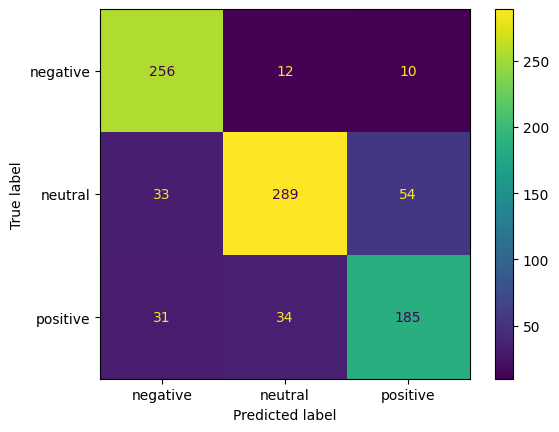

In [5]:
# Get classification report
print(classification_report(d["finBERT"], d["distilBERT"], target_names=["negative", "neutral", "positive"]))

# Get confusion matrix
cm = confusion_matrix(d["finBERT"], d["distilBERT"], labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot()
plt.show()